In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Affordbility

In [3]:
apart2022 = pd.read_csv("../data/curated/apart2022.csv")
house2022 = pd.read_csv("../data/curated/house2022.csv")

In [4]:
# extract useful information for calculating affordability
house = house2022[['suburb','price','2022income']]
apart = apart2022[['suburb','price','2022income']]

In [5]:
house.head()


,suburb,price,2022income
0,EAST MELBOURNE,1100,4224.0
1,EAST MELBOURNE,1100,4224.0
2,EAST MELBOURNE,1150,4224.0
3,EAST MELBOURNE,1150,4224.0
4,EAST MELBOURNE,525,4224.0


In [6]:
from sklearn import preprocessing
# normalisation
# transform each sample of the data into a vector of unit norm
money_list = ['price', '2022income']
scaler = preprocessing.MinMaxScaler()
names = house.columns
house.loc[:,money_list] = scaler.fit_transform(house.loc[:,money_list])
apart.loc[:,money_list] = scaler.fit_transform(apart.loc[:,money_list])


/var/folders/hc/bk1ztr7n3735c7xpl5j8qqvr0000gn/T/ipykernel_40943/1487138951.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house.loc[:,money_list] = scaler.fit_transform(house.loc[:,money_list])
/var/folders/hc/bk1ztr7n3735c7xpl5j8qqvr0000gn/T/ipykernel_40943/1487138951.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apart.loc[:,money_list] = scaler.fit_transform(apart.loc[:,money_list])


In [7]:
apart.head()

,suburb,price,2022income
0,EAST MELBOURNE,0.099,0.03622
1,EAST MELBOURNE,0.099,0.03622
2,EAST MELBOURNE,0.084,0.03622
3,EAST MELBOURNE,0.084,0.03622
4,EAST MELBOURNE,0.110,0.03622


In [8]:
# reset index
house = house.loc[:,money_list].groupby(house['suburb']).mean().reset_index()
apart = apart.loc[:,money_list].groupby(house['suburb']).mean().reset_index()

#### Calculate the affordability 
Make an assumption: By calculating the ratio of income to house prices, it is inferred whether this suburb is affordable

In [9]:
# calculate affordability
house['affordability'] = house["2022income"] / house["price"]
apart['affordability'] = apart["2022income"] / apart["price"]

In [10]:
apart.head()

,suburb,price,2022income,affordability
0,ABBOTSFORD,0.099,0.03622,0.365861
1,AIRPORT WEST,0.099,0.03622,0.365861
2,ALFREDTON,0.084,0.03622,0.431194
3,ALTONA,0.084,0.03622,0.431194
4,ALTONA MEADOWS,0.110,0.03622,0.329275


## Bubble plots visualization

#### House

In [11]:
#transform categorical data to numeric

subs = pd.factorize(house["suburb"])[0].astype(np.uint16)
house['suburbID'] = subs


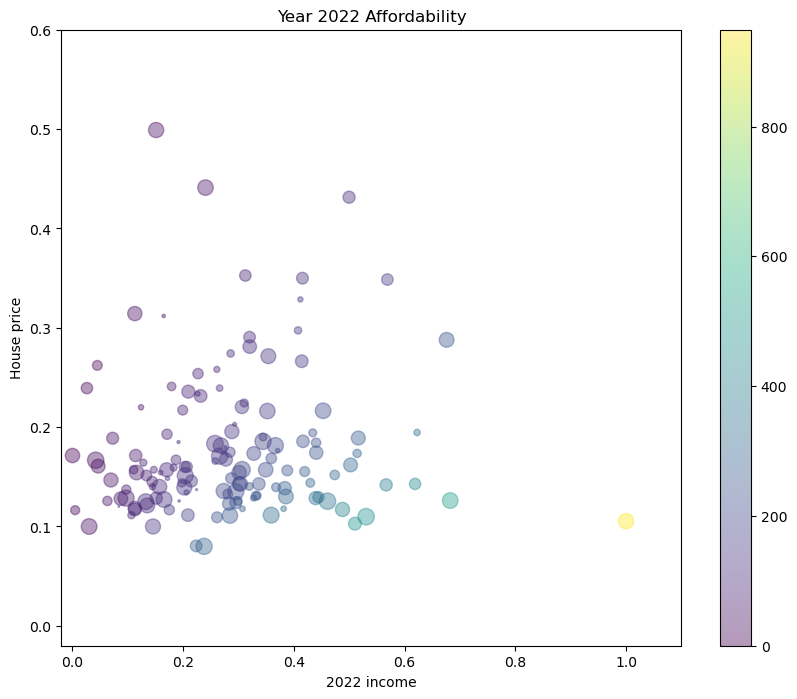

In [12]:
# bubble plot for visualisation
income = np.array(house['2022income'].tolist())

price = np.array(house['price'].tolist())

afford = np.array(house['affordability'].tolist())

sub =  np.array(house['suburbID'].tolist())


plt.figure(figsize=(10, 8))

plt.scatter(x=income, y=price, c = afford*100, s=sub, alpha=0.4)

plt.colorbar()
plt.xlabel("2022 income")
plt.ylabel("House price")
plt.title("Year 2022 Affordability")
plt.ylim(-0.02,0.6)
plt.xlim(-0.02,1.1)
plt.savefig("../plots/house affordability.png")
plt.show()

From the House Year 2022 Affordability bubble plot, it is evident that the higher the house price, the lower the affordability. Meanwhile, the lower the income, the lower the affordability. In addition, high income and low house price provide a high affordability which reflects previous findings. Therefore, high income and low house price enhance the affordability.

### Apartment

In [13]:
# transform categorical data to numeric
subsapart = pd.factorize(apart["suburb"])[0].astype(np.uint16)
apart['suburbID'] = subsapart

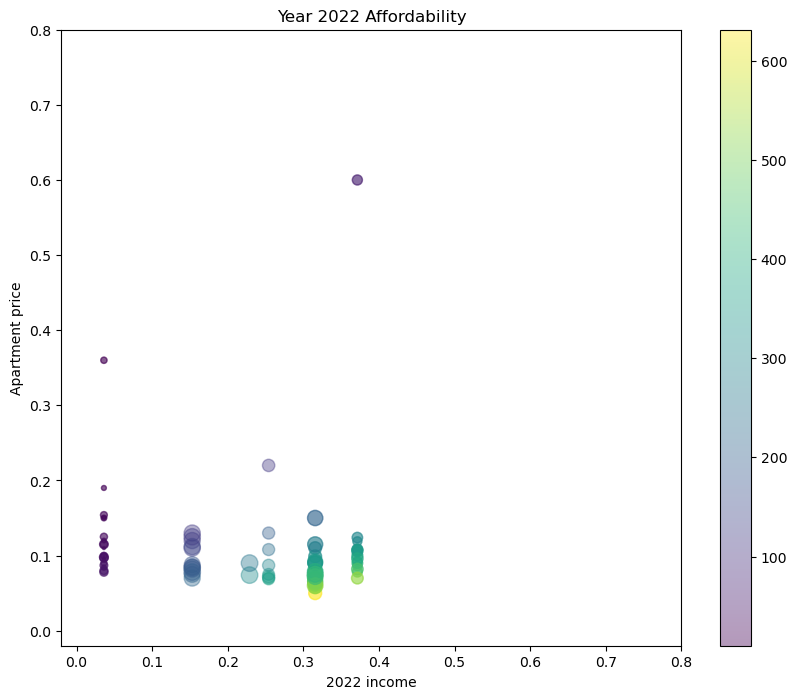

In [14]:
# bubble plot for visualisation
incomeapart = np.array(apart['2022income'].tolist())

priceapart = np.array(apart['price'].tolist())

affordapart = np.array(apart['affordability'].tolist())

subapart =  np.array(apart['suburbID'].tolist())
plt.figure(figsize=(10, 8))

plt.scatter(x=incomeapart, y=priceapart, c = affordapart*100, s=subapart, alpha=0.4)

plt.colorbar()
plt.xlabel("2022 income")
plt.ylabel("Apartment price")
plt.title("Year 2022 Affordability")
plt.ylim(-0.02,0.8)
plt.xlim(-0.02,0.8)
plt.savefig("../plots/apartment affordability.png")
plt.show()

From the Apartment Year 2022 Affordability bubble plot, it is evident that the higher the house price, the lower the affordability. Meanwhile, the lower the income, the lower the affordability. In addition, a relatively high income and low house price provide a high affordability which reflects previous findings. Therefore, only when high income and low house price occur together can enhance the affordability.

In [15]:
# find the most affordable suburb
housetop10 = house.sort_values(by="affordability" , ascending=False)
print("House(affordability): Top10")
print(housetop10.head(10)['suburb'])

House(affordability): Top10
121         TARNEIT
127       TRUGANINA
86     MELTON SOUTH
142    WYNDHAM VALE
66        GROVEDALE
104     PASCOE VALE
77      KEYSBOROUGH
140         WODONGA
65          GLENROY
89           MERNDA
Name: suburb, dtype: object


In [16]:
aparttop10 = apart.sort_values(by="affordability" , ascending=False)
print("Apartment(affordability): Top10")
print(aparttop10.head(10)['suburb'])

Apartment(affordability): Top10
86        MELTON SOUTH
87         MELTON WEST
89              MERNDA
88             MENTONE
71     HEIDELBERG WEST
70       HAWTHORN EAST
125             TOORAK
124          THORNBURY
108           RINGWOOD
109      RINGWOOD EAST
Name: suburb, dtype: object


## Livability

In [17]:
price_apart = pd.read_csv("../data/curated/apart2022.csv")
price_house = pd.read_csv("../data/curated/house2022.csv")

## Find the most liveable suburbs


In [18]:
price_house.columns

Index(['Unnamed: 0', 'price', 'suburb', 'beds', 'baths', 'parking',
       'latitudes', 'longitudes', 'school', 'train_station', 'fitness_gym',
       'hospital', 'shopping_center', 'park', 'erp_2022',
       'natural_increase_2021_22', 'net_internal_migration_2021_22',
       'net_overseas_migration_2021_22', '2022income', 'suburbID'],
      dtype='object')

In [19]:
# normalization the distances between each facility to the domain
from sklearn.preprocessing import MinMaxScaler
facility_list = ['school', 'train_station', 'fitness_gym', 'hospital', 'shopping_center',\
                 'park']
min_max_scaler = MinMaxScaler(feature_range=(0, 100))
price_house.loc[:,facility_list] = min_max_scaler.fit_transform(price_house.loc[:,facility_list])
price_apart.loc[:,facility_list] = min_max_scaler.fit_transform(price_apart.loc[:,facility_list])

In [20]:
# calculate the mean distance
price_house = pd.DataFrame(price_house[facility_list].groupby(price_house['suburb']).mean().reset_index())
price_apart = pd.DataFrame(price_apart[facility_list].groupby(price_apart['suburb']).mean().reset_index())


#### Calculate the livability
Make an assumption: The livability of this suburb is derived by calculating the distance of the domain to the surrounding facilities.

In [21]:
# use the sum of the distances between each facility to the domain
price_house["sum_dis"] = 0
price_apart["sum_dis"] = 0
for i in range(len(price_house)):
    price_house["sum_dis"][i] = price_house.loc[:,facility_list].iloc[i,:].sum()

for i in range(len(price_apart)):   
    price_apart["sum_dis"][i] = price_apart.loc[:,facility_list].iloc[i,:].sum()


/var/folders/hc/bk1ztr7n3735c7xpl5j8qqvr0000gn/T/ipykernel_40943/1127312172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_house["sum_dis"][i] = price_house.loc[:,facility_list].iloc[i,:].sum()
/var/folders/hc/bk1ztr7n3735c7xpl5j8qqvr0000gn/T/ipykernel_40943/1127312172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_apart["sum_dis"][i] = price_apart.loc[:,facility_list].iloc[i,:].sum()


Formula


Bar plot show top 10 suburb with the smallest distances

In [22]:
price_house = price_house.sort_values(by="sum_dis" , ascending=True)

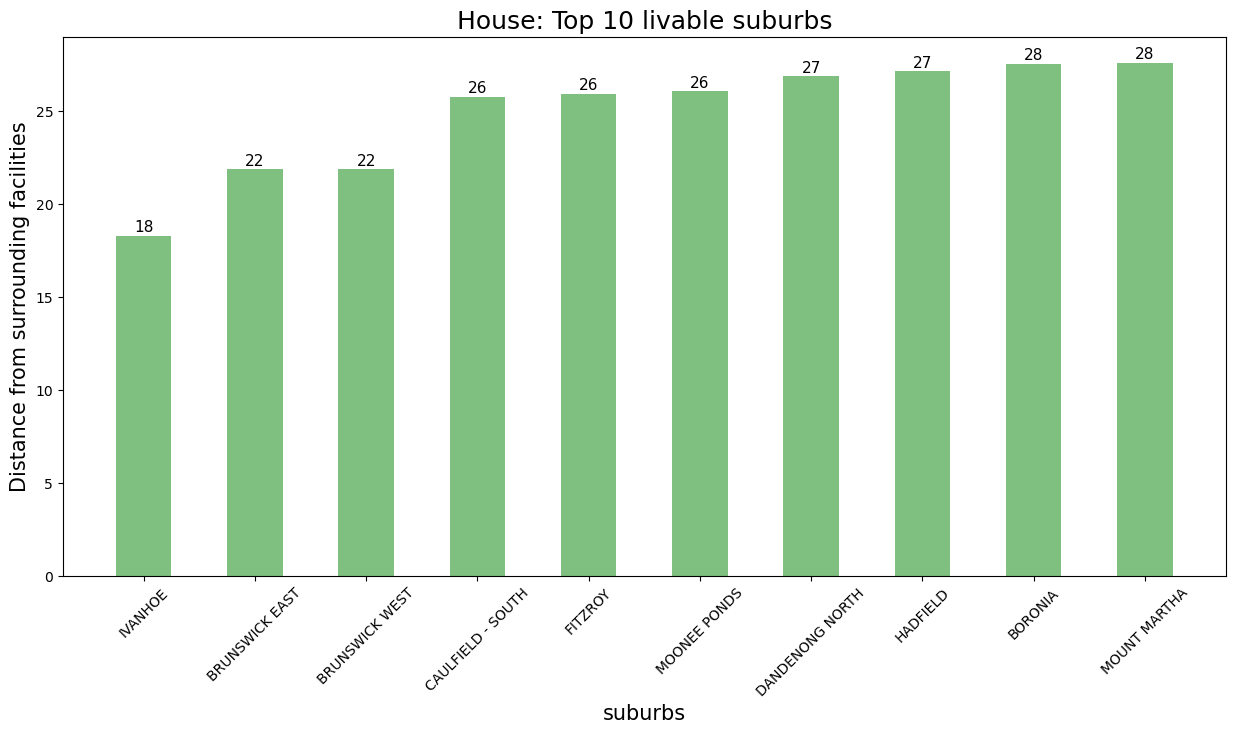

In [23]:
# plot the relationship between income growth rate and top10 suburb
y = price_house['sum_dis'][:10]
x = price_house['suburb'][:10]

fig = plt.figure(figsize =(15, 7))
plt.bar(x, y, alpha=0.5, width = 0.5, linewidth = 15, color = 'green')
plt.title('House: Top 10 livable suburbs', fontsize= 18)
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.xlabel('suburbs', fontsize = 15)
plt.ylabel('Distance from surrounding facilities', fontsize = 15)
plt.xticks(rotation=45)
plt.savefig("../plots/house_liveability.png")
plt.show()


In [24]:
print("House(livability): Top10")
for i in price_house['suburb'][:10]:
    print('Top10suburb is %s' % i)


House(livability): Top10
Top10suburb is IVANHOE
Top10suburb is BRUNSWICK EAST
Top10suburb is BRUNSWICK WEST
Top10suburb is CAULFIELD - SOUTH
Top10suburb is FITZROY
Top10suburb is MOONEE PONDS
Top10suburb is DANDENONG NORTH
Top10suburb is HADFIELD
Top10suburb is BORONIA
Top10suburb is MOUNT MARTHA


In [25]:
price_apart = price_apart.sort_values(by="sum_dis" , ascending=True)

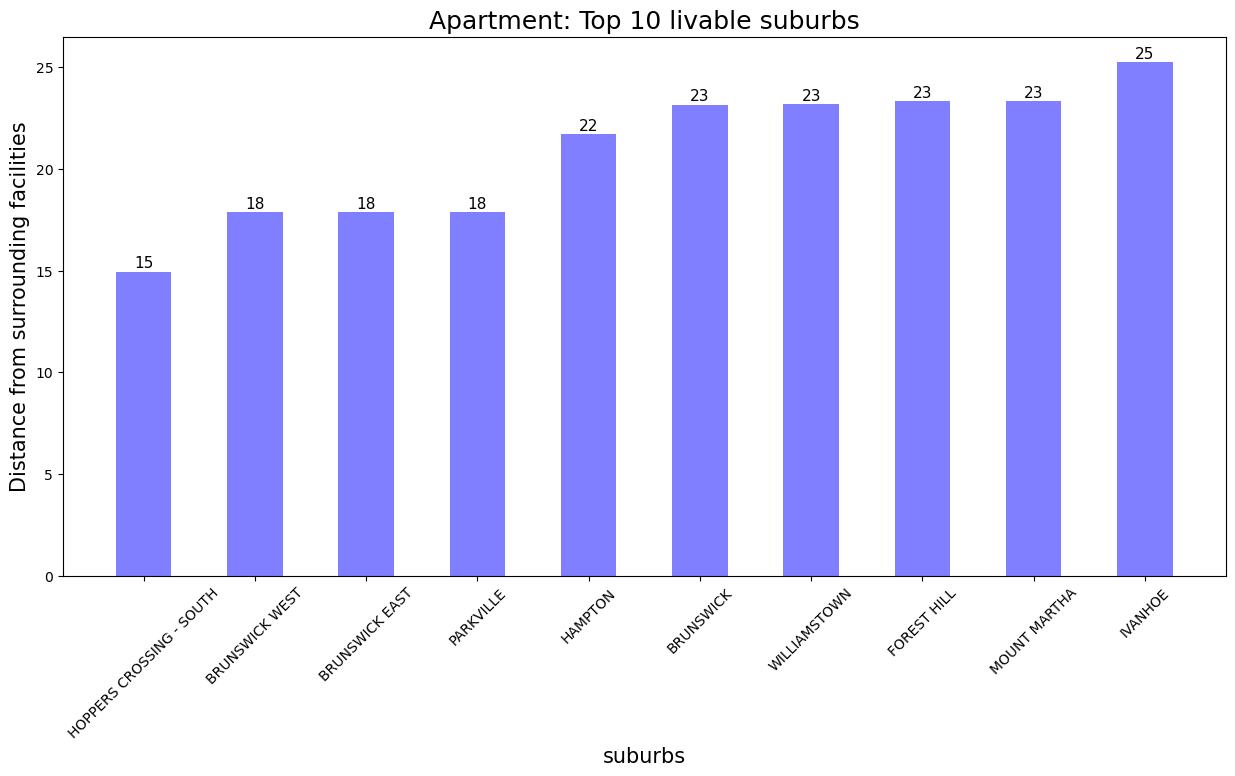

In [26]:
# plot the relationship between income growth rate and top10 suburb
y = price_apart['sum_dis'][:10]
x = price_apart['suburb'][:10]

fig = plt.figure(figsize =(15, 7))
plt.bar(x, y, alpha=0.5, width = 0.5, linewidth = 15, color = 'blue')
plt.title('Apartment: Top 10 livable suburbs', fontsize= 18)
for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)
plt.xlabel('suburbs', fontsize = 15)
plt.ylabel('Distance from surrounding facilities', fontsize = 15)
plt.xticks(rotation=45)
plt.savefig("../plots/apartment_liveability.png")
plt.show()


In [27]:
print("Apartment(livability): Top10")
for i in price_apart['suburb'][:10]:
    print('Top10suburb is %s' % i)


Apartment(livability): Top10
Top10suburb is HOPPERS CROSSING - SOUTH
Top10suburb is BRUNSWICK WEST
Top10suburb is BRUNSWICK EAST
Top10suburb is PARKVILLE
Top10suburb is HAMPTON
Top10suburb is BRUNSWICK
Top10suburb is WILLIAMSTOWN
Top10suburb is FOREST HILL
Top10suburb is MOUNT MARTHA
Top10suburb is IVANHOE


## Liveable and affordable

In [28]:
import folium
import geopandas as gpd
import pandas as pd
import numpy as np
import json

In [29]:
a = pd.merge(apart, price_apart, on='suburb').drop_duplicates()
h = pd.merge(house, price_house, on='suburb').drop_duplicates()

In [30]:
apartment = pd.read_csv("../data/curated/apart2022.csv")
house = pd.read_csv("../data/curated/house2022.csv")
apartment = apartment.loc[:,['suburb', 'latitudes', 'longitudes']].drop_duplicates()
house = house.loc[:,['suburb', 'latitudes', 'longitudes']].drop_duplicates()

In [31]:
a = pd.merge(a, apartment, on='suburb').drop_duplicates()
h = pd.merge(h, house, on='suburb').drop_duplicates()

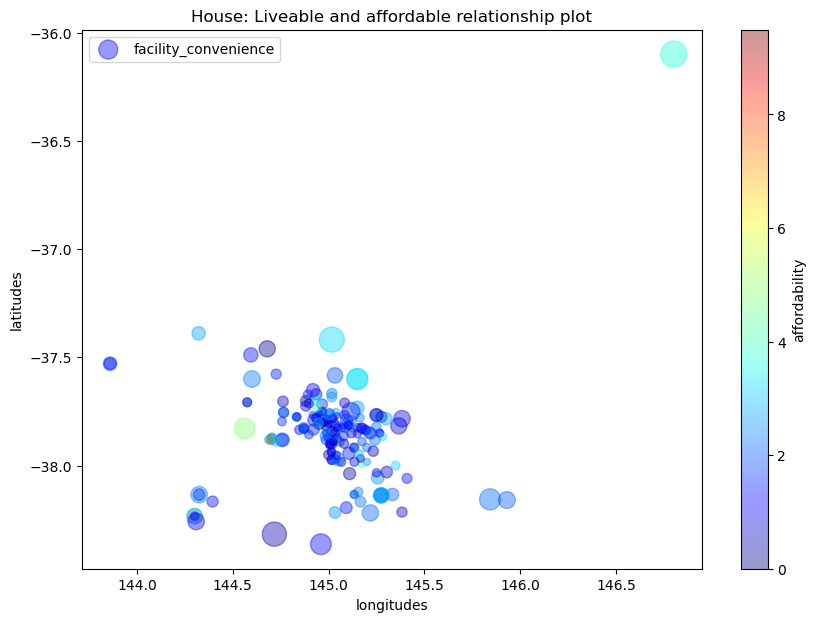

In [87]:
# the circle represents the facility_convenience; the different colors represent \
# the house affordability from blue(low) to red(high)
camp1=plt.get_cmap("jet")
h.plot(kind="scatter", x="longitudes", y="latitudes", alpha=0.4,\
           s='sum_dis', label="facility_convenience", figsize=(10, 7),\
           c='affordability', colormap=camp1, colorbar=True, sharex=False)
plt.title("House: Liveable and affordable relationship plot")
plt.savefig("../plots/house_liveable_affordable.png")
plt.show()

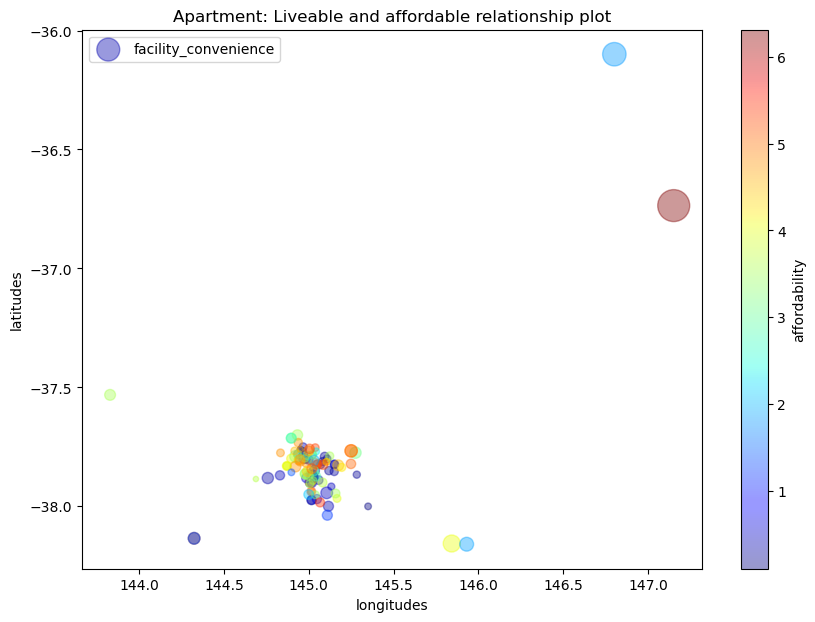

In [88]:
# the circle represents the facility_convenience; the different colors represent \
# the apartment affordability from blue(low) to red(high)
camp1=plt.get_cmap("jet")
a.plot(kind="scatter", x="longitudes", y="latitudes", alpha=0.4,\
           s='sum_dis', label="facility_convenience", figsize=(10, 7),\
           c='affordability', colormap=camp1, colorbar=True, sharex=False)
plt.title("Apartment: Liveable and affordable relationship plot")
plt.savefig("../plots/apart_liveable_affordable.png")
plt.show()

In [1]:
import folium
import geopandas as gpd
import pandas as pd
import numpy as np
import json

/Users/yaojie/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
zones = gpd.read_file("../data/raw/vic_localities/vic_localities.shp")
zones.head()

,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,geometry
0,lcp6229215ba53f,locb0dcb52a6b55,2021-06-24,Abbeyard,Gazetted Locality,VIC,"POLYGON ((146.81721 -37.09735, 146.81729 -37.0..."
1,lcp386f2bcf9bce,locb9872f35df41,2021-06-24,Abbotsford,Gazetted Locality,VIC,"POLYGON ((145.00235 -37.80723, 145.00350 -37.8..."
2,lcp122c942a8fc9,loc8123ed12ea8d,2021-06-24,Aberfeldie,Gazetted Locality,VIC,"POLYGON ((144.89830 -37.76465, 144.89790 -37.7..."
3,lcp9f50bd795d16,loc1eb4a229104a,2021-06-24,Aberfeldy,Gazetted Locality,VIC,"POLYGON ((146.39447 -37.71008, 146.39405 -37.7..."
4,lcp59bf69caacb0,locb17be87767e1,2021-06-24,Acheron,Gazetted Locality,VIC,"POLYGON ((145.75030 -37.24313, 145.75036 -37.2..."


In [34]:
# express location in latitude and longitude and unify the format
zones['geometry'] = zones['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
zones.rename(columns={'LOC_NAME':'suburb'},inplace = True)
zones['suburb'] = zones['suburb'].str.upper()

In [35]:
#convert to json
geoJSON = zones[['suburb', 'geometry']].to_json()
print(geoJSON[:300])

{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"suburb": "ABBEYARD"}, "geometry": {"type": "Polygon", "coordinates": [[[146.8172166420058, -37.09733585571731], [146.81729332194828, -37.09771416572554], [146.81740626189682, -37.09798946573587], [146.817497691


In [38]:
map_apa = folium.Map(location=[ -37.8136, 144.9631], tiles="Stamen Terrain", zoom_start=10)


In [39]:
c = folium.Choropleth(
    geo_data=geoJSON, # geoJSON 
    name='choropleth', # name of plot
    data=a, # data source
    columns=['suburb','affordability'], # the columns required
    key_on='properties.suburb', # this is from the geoJSON's properties
    fill_color='YlOrRd', # color scheme
    nan_fill_color = 'silver',
    highlight=True,
    line_weight= 0.5,
    legend_name='mean price'
)

In [40]:
c.add_to(map_apa)


In [41]:
map_apa.save('../plots/apaMap_afford.html')